In [38]:
import pandas as pd
from datetime import datetime
import os
from dotenv import load_dotenv, find_dotenv
import openai

In [39]:
df = pd.read_csv('./data/cleaned-youtube-desk-setup.csv')
df.head()

,video_id,title,channel,release_date,transcript_text,word_count
0,8cZtbjI5FnQ,My NEW Ultimate Desk Setup &amp; Office Tour 2...,UrAvgConsumer,2023-09-30 16:21:44,what's going on guys it's your average consume...,2856
1,gYgaxdUAAS0,My NEW Ultimate Desk &amp; Setup Tour 2023!,Techno Tim,2023-10-21 15:00:58,What's up everyone? How's it going? So this pa...,3674
2,D43lCHSdrSo,The ALL-ROUNDER Desk Setup - Build &amp; Tour ...,ThisIsE,2023-10-21 13:18:22,this video is brought to you by ug green I've ...,2528
3,KwW-m69tAz8,My ultimate DREAM desk setup (2023),Patrick Rambles,2023-07-04 13:00:13,so guys ever since I've moved into this new st...,3168
4,SjcvBFfMulY,My Productivity Desk Setup (2023),Ali Abdaal,2023-09-19 13:00:32,foreign welcome back to the channel and to m...,4503


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   video_id         417 non-null    object
 1   title            417 non-null    object
 2   channel          417 non-null    object
 3   release_date     417 non-null    object
 4   transcript_text  417 non-null    object
 5   word_count       417 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 19.7+ KB


In [41]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['video_id'].drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   video_id         417 non-null    object        
 1   title            417 non-null    object        
 2   channel          417 non-null    object        
 3   release_date     417 non-null    datetime64[ns]
 4   transcript_text  417 non-null    object        
 5   word_count       417 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 19.7+ KB


In [42]:
df.head()

,video_id,title,channel,release_date,transcript_text,word_count
0,8cZtbjI5FnQ,My NEW Ultimate Desk Setup &amp; Office Tour 2...,UrAvgConsumer,2023-09-30 16:21:44,what's going on guys it's your average consume...,2856
1,gYgaxdUAAS0,My NEW Ultimate Desk &amp; Setup Tour 2023!,Techno Tim,2023-10-21 15:00:58,What's up everyone? How's it going? So this pa...,3674
2,D43lCHSdrSo,The ALL-ROUNDER Desk Setup - Build &amp; Tour ...,ThisIsE,2023-10-21 13:18:22,this video is brought to you by ug green I've ...,2528
3,KwW-m69tAz8,My ultimate DREAM desk setup (2023),Patrick Rambles,2023-07-04 13:00:13,so guys ever since I've moved into this new st...,3168
4,SjcvBFfMulY,My Productivity Desk Setup (2023),Ali Abdaal,2023-09-19 13:00:32,foreign welcome back to the channel and to m...,4503


In [43]:
for index, row in df.iterrows():
    if 'Mac' in row['transcript_text']:
        df.loc[index, 'OS'] = 'Mac'
    elif 'PC' in row['transcript_text'] or 'Windows' in row['transcript_text']:
        df.loc[index, 'OS'] = 'PC'
    else:
        df.loc[index, 'OS'] = 'NA'

/var/folders/jd/pyhvlbhj7zq5ljxf6wrlk5xm0000gn/T/ipykernel_70698/3059296771.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Mac' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[index, 'OS'] = 'Mac'


In [44]:
df['OS'].value_counts()

OS
Mac    275
PC      87
NA      55
Name: count, dtype: int64

In [45]:
df[df['OS']=='NA'].sample(5)

,video_id,title,channel,release_date,transcript_text,word_count,OS
270,yUTNTL_Qku0,The PERFECT Cozy Home Living Room Setup!,Andres Vidoza,2023-10-22 14:00:43,this video is sponsored by Best Buy it's been...,3110,NA
294,NFZnkICPSH8,The Modern DREAM Home Theater Room Makeover 2023,Mike Wat,2023-04-10 14:15:02,- This video is sponsored by Sennheiser. (intr...,4746,NA
155,0BBnJUfZEbs,Building My Dream Home Office With No Experien...,The Value Space,2023-09-28 20:06:44,foreign I've got a giveaway at the end of th...,4430,NA
400,Uo10cMgI8EQ,10 desk accessories because I still can&#39;t ...,Luda,2023-03-19 15:00:15,foreign if you're like me then you love watc...,1363,NA
368,66rYlKFHXD8,My GameDev Youtube Studio After 1 Year (2023),StayAtHomeDev,2023-10-25 18:02:53,over a year ago I began making videos for this...,1356,NA


In [46]:
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns


/Users/andycheung/Desktop/anaconda3/envs/streamlit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andycheung/Desktop/anaconda3/envs/streamlit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andycheung/Desktop/anaconda3/envs/streamlit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


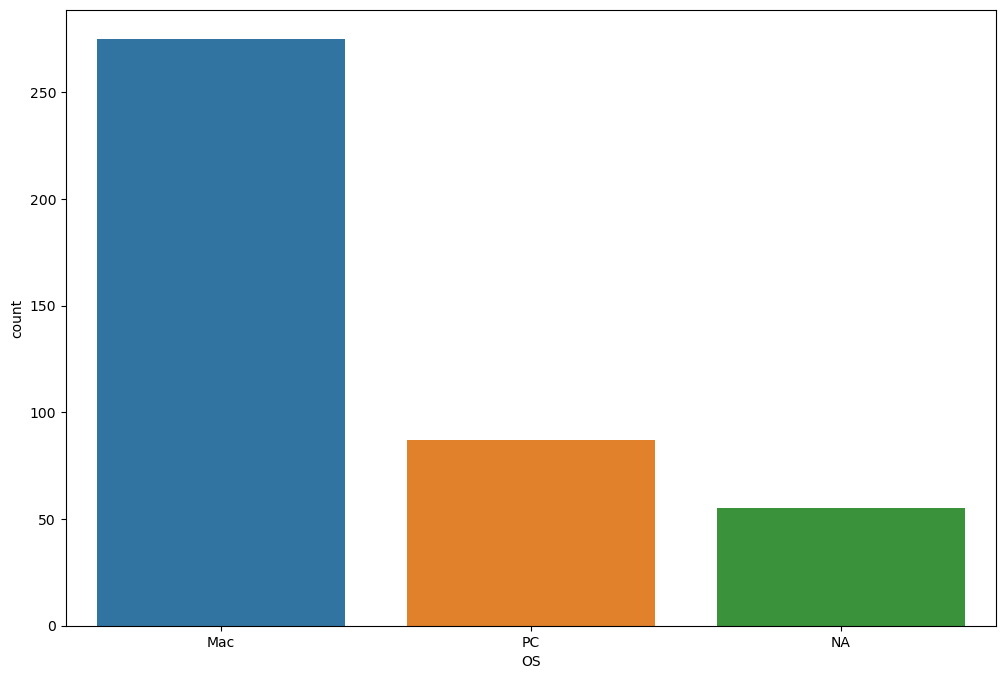

In [47]:


plt.figure(figsize=(12, 8))
sns.countplot(x='OS', data=df)
plt.show()

In [48]:
# try to find out what mouse is the most popular
# create column contains 100 words of transcript before and  after the first occurence of the word 'mouse'
# then pass the column to LLM to extract what type of mouse is used

for index, row in df.iterrows():
    if 'mouse' in row['transcript_text']:
        words = row['transcript_text'].split()
        try:
            mouse_index = words.index('mouse')
        except ValueError:
            mouse_index = None
        if mouse_index is not None:
            start_index = max(0, mouse_index - 250)
            end_index = min(len(words), mouse_index + 251)
            context_words = words[start_index:end_index]
            context = ' '.join(context_words)
            df.loc[index, 'mouse_context'] = context
        else:
            df.loc[index, 'mouse_context'] = 'NA'
    else:
        df.loc[index, 'mouse_context'] = 'NA'


/var/folders/jd/pyhvlbhj7zq5ljxf6wrlk5xm0000gn/T/ipykernel_70698/3363739382.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[index, 'mouse_context'] = 'NA'


In [49]:
df['mouse_context'].sample(15)

116    some time now I can confidently say that it ha...
58     winner Gerald I really enjoyed your setup it's...
236                                                   NA
184    is assembled they gotta put together the setup...
305    foreign I had a lot of requests from you for t...
187    but I won't bore you guys to death I'm sure yo...
362                                                   NA
115    always have a USBC cable and lightning cable c...
340    on the channel um and if it's out I'll put a l...
21                                                    NA
69                                                    NA
49     so guys most of our desk setups have the same ...
137                                                   NA
270                                                   NA
235    use the camera the only other option is using ...
Name: mouse_context, dtype: object

In [50]:
from dotenv import load_dotenv, find_dotenv
import requests

load_dotenv(find_dotenv())

hf_api_key = os.environ.get("HF_API_KEY")

#API_URL = "https://api-inference.huggingface.co/models/distilbert-base-cased-distilled-squad"
API_URL = "https://api-inference.huggingface.co/models/deepset/roberta-base-squad2"
headers = {"Authorization": f"Bearer {hf_api_key}"}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.json()
	

In [51]:
for index, row in df.iterrows():
    if row['mouse_context'] != ' NA':
        ans = {'answer': 'NA'}
        try :
            ans = query({
            "inputs": {
                "question": "What is the name of the computer mouse?",
                "context": row['mouse_context']
                    }
                })
            df.loc[index, 'mouse'] = ans['answer']
            print(index, ans['answer'])
        except:
            df.loc[index, 'mouse'] = 'NA'
    else:
        df.loc[index, 'mouse'] = 'NA'


/var/folders/jd/pyhvlbhj7zq5ljxf6wrlk5xm0000gn/T/ipykernel_70698/78715545.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[index, 'mouse'] = ans['answer']


0 NA
1 super high DPI mouse
2 Gladius 3 Gladius Gladius
3 Logitech MX Master 3s
4 Logitech MX Master 3s Mouse
5 mxm 3
6 NA
7 V3 Mouse
8 magic mouse
9 Logitech MX Master 3s
10 Logitech mx3
11 Logitech MX Master III
12 Logitech mxm 3s
13 MX Master 3s
14 MX Master 3s
15 Logitech MX Master 3s
16 Logitech MX Master 3s
17 cinder
18 Groove
19 MX Master
20 Logitech MX Master 3
21 NA
22 Logitech MX monster 3s
23 Razer Basilisk V3 Pro
24 Microsoft Arc 2 Mouse
25 Mac Studio
26 basus
27 Razer Orochi V2
28 gimbal
29 Logitech mxm 3s
30 Logitech MX master
31 keyboard
32 NA
33 Logitech G Pro X
34 Logitech
35 NA
36 g502x
37 MX Master 2s
38 NA
39 lodgy MX Master 3s Mouse
40 NA
42 g502 Lightspeed
43 keyboard
44 NA
45 NA
46 Carpio 2.0
47 Logitech
48 Logitech MX Masters 3
49 keyboard
50 Halo 65
51 NA
52 NA
53 m-book mode
54 MX Master Mouse
55 gaming mouse pad
56 NA
57 NA
58 rocat cone XP air mouse
59 Razer
60 MX Master 3s
61 TS3
62 Logitech craft
63 MX Master 3s
64 NA
65 MX Master 3
67 NA
68 the mouse
69 N

In [52]:
df['mouse'].sample(5)

86         Asus Rog harp
146      DaVinci Resolve
112                   NA
255                   NA
169    MX anywhere Mouse
Name: mouse, dtype: object

In [53]:
df['mouse'].value_counts()

mouse
NA                        127
keyboard                   15
MX Master 3s               10
Logitech MX Master 3s      10
Logitech MX Master III      8
                         ... 
Flint                       1
touchpad                    1
MX anywhere Mouse           1
Dex                         1
G-Force                     1
Name: count, Length: 199, dtype: int64

/Users/andycheung/Desktop/anaconda3/envs/streamlit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andycheung/Desktop/anaconda3/envs/streamlit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


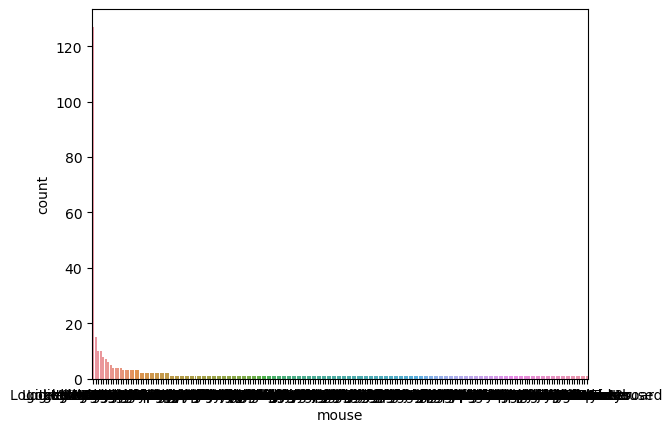

In [54]:
sns.countplot(x='mouse', data=df, order=df['mouse'].value_counts().index)
plt.show()

In [55]:
df.to_csv('./data/LLM-cleaned-data.csv', index=False)